In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Auction Analysis

In [212]:
Data=pd.read_csv("ipl_2022_dataset.csv")
Data

,index,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans
...,...,...,...,...,...,...,...,...
628,628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [213]:
Data.head()

,index,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [214]:
Data.tail()

,index,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
628,628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
632,632,Aaron Hardie,20 Lakh,ALL-ROUNDER,NaN,NaN,NaN,Unsold


In [215]:
Data.info

<bound method DataFrame.info of      index                  Player  Base Price         TYPE  COST IN ₹ (CR.)  \
0        0             Rashid Khan  Draft Pick       BOWLER             15.0   
1        1           Hardik Pandya  Draft Pick  ALL-ROUNDER             15.0   
2        2         Lockie Ferguson        2 Cr       BOWLER             10.0   
3        3           Rahul Tewatia     40 Lakh  ALL-ROUNDER              9.0   
4        4            Shubman Gill  Draft Pick       BATTER              8.0   
..     ...                     ...         ...          ...              ...   
628    628            Sairaj Patil     20 Lakh       BATTER              NaN   
629    629              Monu Singh     20 Lakh       BOWLER              NaN   
630    630  Nivethan Radhakrishnan     20 Lakh       BOWLER              NaN   
631    631            Lance Morris     20 Lakh       BOWLER              NaN   
632    632            Aaron Hardie     20 Lakh  ALL-ROUNDER              NaN   

     Co

In [216]:
Data.describe(include="all")

,index,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
count,633.000000,633,633,633,237.000000,237.000000,199,633
unique,NaN,629,10,4,NaN,NaN,8,11
top,NaN,Lalit Yadav,20 Lakh,ALL-ROUNDER,NaN,NaN,MI,Unsold
freq,NaN,2,344,242,NaN,NaN,26,396
mean,316.000000,NaN,NaN,NaN,3.695781,480.451477,NaN,NaN
std,182.875641,NaN,NaN,NaN,4.238092,550.951945,NaN,NaN
min,0.000000,NaN,NaN,NaN,0.200000,26.000000,NaN,NaN
25%,158.000000,NaN,NaN,NaN,0.400000,52.000000,NaN,NaN
50%,316.000000,NaN,NaN,NaN,1.900000,247.000000,NaN,NaN
75%,474.000000,NaN,NaN,NaN,6.500000,845.000000,NaN,NaN


In [217]:
# Data Cleaning 

In [218]:
Data.isnull().sum()

index                0
Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [219]:
Data['COST IN ₹ (CR.)']=Data['COST IN ₹ (CR.)'].fillna(0)  

In [220]:
Data['Cost IN $ (000)']=Data['Cost IN $ (000)'].fillna(0)

In [221]:
Data['2021 Squad']=Data['2021 Squad'].fillna(0)

In [222]:
Data.isnull().sum()

index              0
Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

#  Batsman Sold

In [223]:
#Data Preparation for Batsman

In [224]:
Batters = Data.loc[(Data["TYPE"]=="BATTER")]
Batters_sold=Batters.loc[(Batters['COST IN ₹ (CR.)']>=6.5)]
Batters_sold

,index,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
4,4,Shubman Gill,Draft Pick,BATTER,8.00,1040.0,KKR,Gujarat Titans
50,50,Prithvi Shaw,Retained,BATTER,7.50,975.0,DC,Delhi Capitals
71,71,Shreyas Iyer,2 Cr,BATTER,12.25,1592.5,DC,Kolkata Knight Riders
96,96,Mayank Agarwal,Retained,BATTER,12.00,1560.0,PBKS,Punjab Kings
100,100,Shikhar Dhawan,2 Cr,BATTER,8.25,1072.5,DC,Punjab Kings
143,143,Rohit Sharma,Retained,BATTER,16.00,2080.0,MI,Mumbai Indians
148,148,Suryakumar Yadav,Retained,BATTER,8.00,1040.0,MI,Mumbai Indians
168,168,Virat Kohli,Retained,BATTER,15.00,1950.0,RCB,Royal Challengers Bangalore
173,173,Faf Du Plessis,2 Cr,BATTER,7.00,910.0,CSK,Royal Challengers Bangalore
193,193,Shimron Hetmyer,1.5 Cr,BATTER,8.50,1105.0,DC,Rajasthan Royals


In [225]:
Top_Batters_sold=Batters_sold.sort_values('COST IN ₹ (CR.)',ascending=False)
Top_Batters_sold

,index,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
143,143,Rohit Sharma,Retained,BATTER,16.00,2080.0,MI,Mumbai Indians
168,168,Virat Kohli,Retained,BATTER,15.00,1950.0,RCB,Royal Challengers Bangalore
214,214,Kane Williamson,Retained,BATTER,14.00,1820.0,SRH,Sunrisers Hyderabad
71,71,Shreyas Iyer,2 Cr,BATTER,12.25,1592.5,DC,Kolkata Knight Riders
96,96,Mayank Agarwal,Retained,BATTER,12.00,1560.0,PBKS,Punjab Kings
193,193,Shimron Hetmyer,1.5 Cr,BATTER,8.50,1105.0,DC,Rajasthan Royals
217,217,Rahul Tripathi,40 Lakh,BATTER,8.50,1105.0,KKR,Sunrisers Hyderabad
100,100,Shikhar Dhawan,2 Cr,BATTER,8.25,1072.5,DC,Punjab Kings
4,4,Shubman Gill,Draft Pick,BATTER,8.00,1040.0,KKR,Gujarat Titans
148,148,Suryakumar Yadav,Retained,BATTER,8.00,1040.0,MI,Mumbai Indians


In [226]:
Top11_Batters_sold=Top_Batters_sold.nlargest(11,['COST IN ₹ (CR.)'])
Top11_Batters_sold

,index,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
143,143,Rohit Sharma,Retained,BATTER,16.00,2080.0,MI,Mumbai Indians
168,168,Virat Kohli,Retained,BATTER,15.00,1950.0,RCB,Royal Challengers Bangalore
214,214,Kane Williamson,Retained,BATTER,14.00,1820.0,SRH,Sunrisers Hyderabad
71,71,Shreyas Iyer,2 Cr,BATTER,12.25,1592.5,DC,Kolkata Knight Riders
96,96,Mayank Agarwal,Retained,BATTER,12.00,1560.0,PBKS,Punjab Kings
193,193,Shimron Hetmyer,1.5 Cr,BATTER,8.50,1105.0,DC,Rajasthan Royals
217,217,Rahul Tripathi,40 Lakh,BATTER,8.50,1105.0,KKR,Sunrisers Hyderabad
100,100,Shikhar Dhawan,2 Cr,BATTER,8.25,1072.5,DC,Punjab Kings
4,4,Shubman Gill,Draft Pick,BATTER,8.00,1040.0,KKR,Gujarat Titans
148,148,Suryakumar Yadav,Retained,BATTER,8.00,1040.0,MI,Mumbai Indians


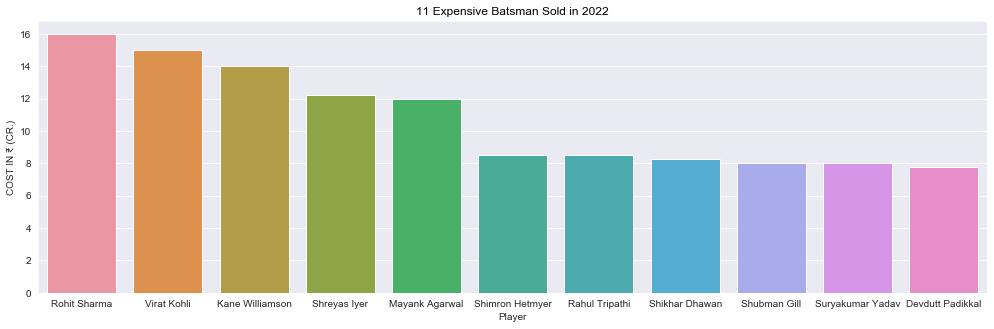

In [227]:
plt.figure(figsize=(17,5))
sns.barplot(x='Player',y='COST IN ₹ (CR.)',data=Top11_Batters_sold)
plt.title('11 Expensive Batsman Sold in 2022',color='black')
sns.set_style(style="darkgrid")
plt.show()

#  Bowlers Sold

In [228]:
#Data Preparation for Bowlers

In [229]:
Bowlers=Data.loc[(Data["TYPE"]=="BOWLER")]
Bowlers_sold=Bowlers.loc[(Bowlers['COST IN ₹ (CR.)']>6.5)]
Bowlers_sold

,index,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.00,1950.0,SRH,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans
23,23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings
48,48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals
75,75,Varun Chakaravarthy,Retained,BOWLER,8.00,1040.0,KKR,Kolkata Knight Riders
98,98,Kagiso Rabada,2 Cr,BOWLER,9.25,1202.5,DC,Punjab Kings
122,122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants
126,126,Mark Wood,2 Cr,BOWLER,7.50,975.0,0,Lucknow Super Giants
145,145,Jasprit Bumrah,Retained,BOWLER,12.00,1560.0,MI,Mumbai Indians
172,172,Josh Hazlewood,2 Cr,BOWLER,7.75,1007.5,CSK,Royal Challengers Bangalore


In [230]:
Top_Bowlers_sold=Bowlers_sold.sort_values('COST IN ₹ (CR.)',ascending=False)
Top_Bowlers_sold

,index,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.00,1950.0,SRH,Gujarat Titans
23,23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings
145,145,Jasprit Bumrah,Retained,BOWLER,12.00,1560.0,MI,Mumbai Indians
48,48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals
2,2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans
122,122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants
192,192,Prasidh Krishna,1 Cr,BOWLER,10.00,1300.0,KKR,Rajasthan Royals
98,98,Kagiso Rabada,2 Cr,BOWLER,9.25,1202.5,DC,Punjab Kings
75,75,Varun Chakaravarthy,Retained,BOWLER,8.00,1040.0,KKR,Kolkata Knight Riders
194,194,Trent Boult,2 Cr,BOWLER,8.00,1040.0,MI,Rajasthan Royals


In [231]:
Top11_Bowlers_sold=Top_Bowlers_sold.nlargest(11,['COST IN ₹ (CR.)'])
Top11_Bowlers_sold

,index,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.00,1950.0,SRH,Gujarat Titans
23,23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings
145,145,Jasprit Bumrah,Retained,BOWLER,12.00,1560.0,MI,Mumbai Indians
48,48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals
2,2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans
122,122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants
192,192,Prasidh Krishna,1 Cr,BOWLER,10.00,1300.0,KKR,Rajasthan Royals
98,98,Kagiso Rabada,2 Cr,BOWLER,9.25,1202.5,DC,Punjab Kings
75,75,Varun Chakaravarthy,Retained,BOWLER,8.00,1040.0,KKR,Kolkata Knight Riders
194,194,Trent Boult,2 Cr,BOWLER,8.00,1040.0,MI,Rajasthan Royals


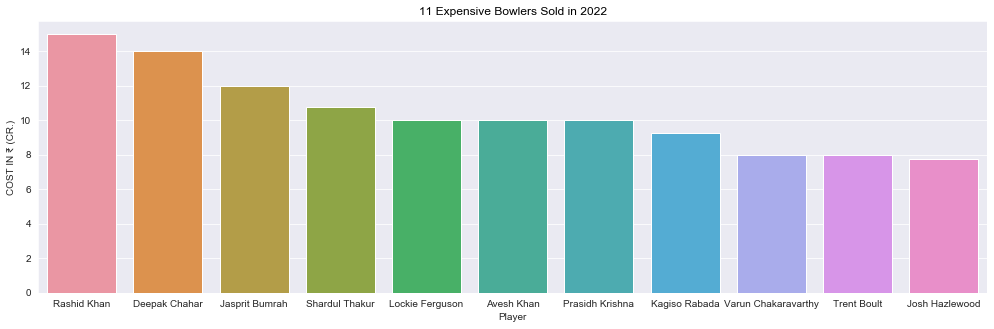

In [232]:
plt.figure(figsize=(17,5))
sns.barplot(data=Top11_Bowlers_sold,x='Player',y='COST IN ₹ (CR.)')
plt.title('11 Expensive Bowlers Sold in 2022',color='black')
plt.show()

# All Rounders Sold

In [233]:
#Data Preparation for All Rounders

In [234]:
Rounder=Data.loc[(Data["TYPE"]=="ALL-ROUNDER")]
Rounder_sold=Rounder.loc[(Rounder['COST IN ₹ (CR.)']>6.5)]
Rounder_sold

,index,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.00,1950.0,MI,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,1170.0,RR,Gujarat Titans
22,22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.00,2080.0,CSK,Chennai Super Kings
25,25,Moeen Ali,Retained,ALL-ROUNDER,8.00,1040.0,CSK,Chennai Super Kings
49,49,Axar Patel,Retained,ALL-ROUNDER,9.00,1170.0,DC,Delhi Capitals
72,72,Andre Russell,Retained,ALL-ROUNDER,12.00,1560.0,KKR,Kolkata Knight Riders
73,73,Nitish Rana,1 Cr,ALL-ROUNDER,8.00,1040.0,KKR,Kolkata Knight Riders
74,74,Venkatesh Iyer,Retained,ALL-ROUNDER,8.00,1040.0,KKR,Kolkata Knight Riders
76,76,Pat Cummins,2 Cr,ALL-ROUNDER,7.25,942.5,KKR,Kolkata Knight Riders
77,77,Shivam Mavi,40 Lakh,ALL-ROUNDER,7.25,942.5,KKR,Kolkata Knight Riders


In [235]:
Top_Rounder_sold=Rounder_sold.sort_values('COST IN ₹ (CR.)',ascending=False)
Top_Rounder_sold

,index,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
22,22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.00,2080.0,CSK,Chennai Super Kings
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.00,1950.0,MI,Gujarat Titans
72,72,Andre Russell,Retained,ALL-ROUNDER,12.00,1560.0,KKR,Kolkata Knight Riders
97,97,Liam Livingstone,1 Cr,ALL-ROUNDER,11.50,1495.0,RR,Punjab Kings
169,169,Glenn Maxwell,Retained,ALL-ROUNDER,11.00,1430.0,RCB,Royal Challengers Bangalore
171,171,Harshal Patel,2 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore
170,170,Wanindu Hasaranga,1 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore
123,123,Marcus Stoinis,Draft Pick,ALL-ROUNDER,9.20,1196.0,DC,Lucknow Super Giants
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,1170.0,RR,Gujarat Titans
99,99,Shahrukh Khan,40 Lakh,ALL-ROUNDER,9.00,1170.0,PBKS,Punjab Kings


In [236]:
Top11_Rounder_sold=Top_Rounder_sold.nlargest(11,['COST IN ₹ (CR.)'])
Top11_Rounder_sold

,index,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
22,22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.00,2080.0,CSK,Chennai Super Kings
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.00,1950.0,MI,Gujarat Titans
72,72,Andre Russell,Retained,ALL-ROUNDER,12.00,1560.0,KKR,Kolkata Knight Riders
97,97,Liam Livingstone,1 Cr,ALL-ROUNDER,11.50,1495.0,RR,Punjab Kings
169,169,Glenn Maxwell,Retained,ALL-ROUNDER,11.00,1430.0,RCB,Royal Challengers Bangalore
171,171,Harshal Patel,2 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore
170,170,Wanindu Hasaranga,1 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore
123,123,Marcus Stoinis,Draft Pick,ALL-ROUNDER,9.20,1196.0,DC,Lucknow Super Giants
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,1170.0,RR,Gujarat Titans
99,99,Shahrukh Khan,40 Lakh,ALL-ROUNDER,9.00,1170.0,PBKS,Punjab Kings


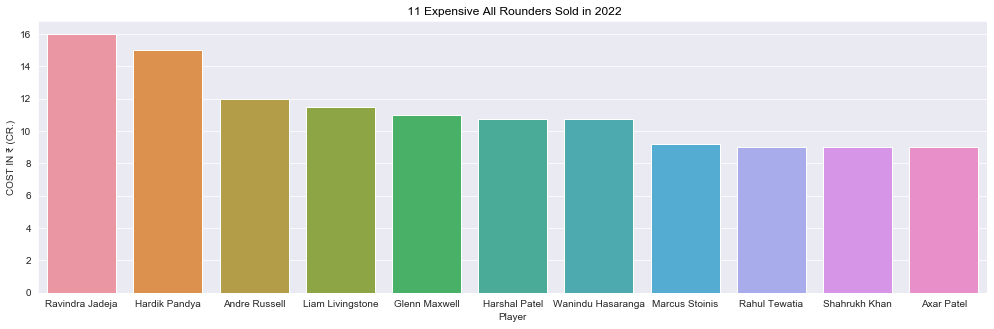

In [237]:
plt.figure(figsize=(17,5))
sns.barplot(x='Player',y='COST IN ₹ (CR.)',data=Top11_Rounder_sold)
plt.title(' 11 Expensive All Rounders Sold in 2022',color='black')
plt.show()

# 11 Expensive Players in 2022 IPL

In [238]:
#Data Preparation for Expensive Players

In [239]:
Data.Team.value_counts()

Unsold                         396
Mumbai Indians                  25
Kolkata Knight Riders           25
Punjab Kings                    25
Chennai Super Kings             25
Delhi Capitals                  24
Rajasthan Royals                24
Sunrisers Hyderabad             23
Gujarat Titans                  22
Royal Challengers Bangalore     22
Lucknow Super Giants            22
Name: Team, dtype: int64

In [240]:
Data['2021 Squad'].value_counts()

0       434
MI       26
SRH      26
CSK      25
KKR      25
DC       25
RR       25
PBKS     24
RCB      23
Name: 2021 Squad, dtype: int64

In [241]:
#searching the top 11 Expensive players and finding out if them are bought by another team on what Price in 2022
Player_Moved=Data.sort_values(by="COST IN ₹ (CR.)", ascending= False).head(11)[["Player","2021 Squad","Team","COST IN ₹ (CR.)"]]
Player_Moved
Player_Moved.set_index('Player')

,2021 Squad,Team,COST IN ₹ (CR.)
Player,,,
KL Rahul,PBKS,Lucknow Super Giants,17.00
Ravindra Jadeja,CSK,Chennai Super Kings,16.00
Rohit Sharma,MI,Mumbai Indians,16.00
Rishabh Pant,DC,Delhi Capitals,16.00
Ishan Kishan,MI,Mumbai Indians,15.25
Virat Kohli,RCB,Royal Challengers Bangalore,15.00
Rashid Khan,SRH,Gujarat Titans,15.00
Hardik Pandya,MI,Gujarat Titans,15.00
Kane Williamson,SRH,Sunrisers Hyderabad,14.00


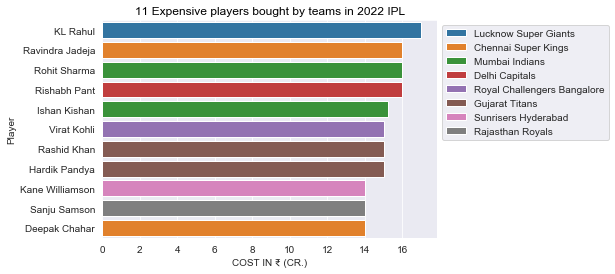

In [242]:
sns.barplot(x="COST IN ₹ (CR.)",y="Player",data=Player_Moved,hue="Team",dodge=False)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.title("11 Expensive players bought by teams in 2022 IPL",color='black')
plt.show()

# Players Batting Performance 

In [243]:
Batting_data=pd.read_csv("batting.csv")
Batting_data

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin
0,1,1,CSK,Ruturaj Gaikwad,1,Umesh Yadav,c Nitish Rana b Umesh Yadav,0,4,4,0,0,0,0,0,0.00,3.0,3,0
1,1,1,CSK,Devon Conway,2,Umesh Yadav,c Shreyas Iyer b Umesh Yadav,3,8,5,3,0,0,0,0,37.50,2.0,8,0
2,1,1,CSK,Robin Uthappa,3,Varun Chakaravarthy,st Sheldon Jackson b Varun Chakaravarthy,28,21,10,6,1,0,2,2,133.33,5.0,15,6
3,1,1,CSK,Ambati Rayudu,4,Sunil Narine,run out (Shreyas Iyer),15,17,10,5,0,0,1,1,88.24,1.0,4,13
4,1,1,CSK,Ravindra Jadeja,5,NaN,not out,26,28,8,18,1,0,0,1,92.86,NaN,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,76,2,GT,Rashid Khan,7,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1624,76,2,GT,Sai Kishore,8,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1625,76,2,GT,Mohammad Shami,9,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1626,76,2,GT,Lockie Ferguson,10,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0


In [244]:
Batting_data.head()

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin
0,1,1,CSK,Ruturaj Gaikwad,1,Umesh Yadav,c Nitish Rana b Umesh Yadav,0,4,4,0,0,0,0,0,0.00,3.0,3,0
1,1,1,CSK,Devon Conway,2,Umesh Yadav,c Shreyas Iyer b Umesh Yadav,3,8,5,3,0,0,0,0,37.50,2.0,8,0
2,1,1,CSK,Robin Uthappa,3,Varun Chakaravarthy,st Sheldon Jackson b Varun Chakaravarthy,28,21,10,6,1,0,2,2,133.33,5.0,15,6
3,1,1,CSK,Ambati Rayudu,4,Sunil Narine,run out (Shreyas Iyer),15,17,10,5,0,0,1,1,88.24,1.0,4,13
4,1,1,CSK,Ravindra Jadeja,5,NaN,not out,26,28,8,18,1,0,0,1,92.86,NaN,14,14


In [245]:
Batting_data.tail()

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin
1623,76,2,GT,Rashid Khan,7,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1624,76,2,GT,Sai Kishore,8,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1625,76,2,GT,Mohammad Shami,9,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1626,76,2,GT,Lockie Ferguson,10,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1627,76,2,GT,Yash Dayal,11,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0


In [246]:
Batting_data.info

<bound method DataFrame.info of       MatchID  InningsNo Team        PlayerName  MatchPlayingOrder  \
0           1          1  CSK  Ruturaj  Gaikwad                  1   
1           1          1  CSK      Devon Conway                  2   
2           1          1  CSK     Robin Uthappa                  3   
3           1          1  CSK     Ambati Rayudu                  4   
4           1          1  CSK   Ravindra Jadeja                  5   
...       ...        ...  ...               ...                ...   
1623       76          2   GT       Rashid Khan                  7   
1624       76          2   GT       Sai Kishore                  8   
1625       76          2   GT    Mohammad Shami                  9   
1626       76          2   GT   Lockie Ferguson                 10   
1627       76          2   GT        Yash Dayal                 11   

               BowlerName                                   OutDesc  Runs  \
0             Umesh Yadav               c Nitish R

In [247]:
Batting_data.describe(include='all')

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin
count,1628.000000,1628.000000,1628,1628,1628.000000,912,1176,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628,911.000000,1628.000000,1628.000000
unique,NaN,NaN,10,190,NaN,105,633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360,NaN,NaN,NaN
top,NaN,NaN,RR,Sanju Samson,NaN,Yuzvendra Chahal,not out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN
freq,NaN,NaN,187,17,NaN,29,264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470,NaN,NaN,NaN
mean,37.608108,1.500000,NaN,NaN,6.000000,NaN,NaN,14.159705,10.571253,4.093980,3.921376,0.627150,0.035627,1.238943,0.652334,NaN,4.472009,6.824324,3.702703
std,21.547791,0.500154,NaN,NaN,3.163249,NaN,NaN,20.275401,13.142609,4.778989,5.697342,1.153994,0.201307,2.058166,1.272667,NaN,2.863763,8.534458,5.950012
min,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000
25%,19.000000,1.000000,NaN,NaN,3.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,0.000000,0.000000
50%,37.500000,1.500000,NaN,NaN,6.000000,NaN,NaN,5.000000,6.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,4.000000,4.000000,0.000000
75%,56.000000,2.000000,NaN,NaN,9.000000,NaN,NaN,22.000000,16.000000,7.000000,6.000000,1.000000,0.000000,2.000000,1.000000,NaN,6.000000,11.000000,5.000000


In [248]:
#Data Cleaning

In [249]:
Batting_data.isnull().sum()

MatchID                0
InningsNo              0
Team                   0
PlayerName             0
MatchPlayingOrder      0
BowlerName           716
OutDesc              452
Runs                   0
Balls                  0
DotBalls               0
Ones                   0
Twos                   0
Threes                 0
Fours                  0
Sixes                  0
StrikeRate             0
WicketNo             717
AgainstFast            0
AgainstSpin            0
dtype: int64

In [250]:
Batting_data["BowlerName"]=Batting_data["BowlerName"].fillna(0)  
Batting_data["OutDesc"]=Batting_data["OutDesc"].fillna(0)

In [251]:
#Data Preparation For Players Batting Performance

In [252]:
Batters=Batting_data.loc[(Batting_data['Runs']>=50)]
Batters

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin
6,1,1,CSK,MS Dhoni,6,0,not out,50,38,16,12,2,0,7,1,131.58,NaN,25,12
23,2,1,MI,Ishan Kishan,1,0,not out,81,48,12,21,2,0,11,2,168.75,NaN,21,27
44,3,1,RCB,Faf Du Plessis,1,Arshdeep Singh,c Shahrukh Khan b Arshdeep Singh,88,57,21,18,8,0,3,7,154.39,1.0,31,26
70,4,1,LSG,Deepak Hooda,7,Rashid Khan,lbw Rashid Khan,55,41,17,14,1,1,6,2,134.15,8.0,30,11
71,4,1,LSG,Ayush Badoni,8,Varun Aaron,c Hardik Pandya b Varun Aaron,54,41,15,18,1,0,4,3,131.71,1.0,29,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,73,2,GT,David Miller,5,0,not out,68,38,7,20,3,0,3,5,178.95,NaN,24,13
1564,74,1,RCB,Rajat Patidar,3,0,not out,112,54,15,18,2,0,12,7,207.41,NaN,31,22
1574,74,2,LSG,K L Rahul,2,Josh Hazlewood,c Shahbaz Ahmed b Josh Hazlewood,79,58,17,30,2,1,3,5,136.21,3.0,34,24
1586,75,1,RCB,Rajat Patidar,3,Ravichandran Ashwin,c Jos Buttler b Ravichandran Ashwin,58,42,13,20,2,0,4,3,138.10,1.0,21,21


In [253]:
Top_Batters=Batters.sort_values('Runs',ascending=False)
Top_Batters

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin
1430,66,1,LSG,Quinton De Kock,1,0,not out,140,70,15,30,5,0,10,10,200.00,NaN,42,28
726,34,1,RR,Jos Buttler,1,Mustafizur Rahman,c David Warner b Mustafizur Rahman,116,65,24,20,3,0,9,9,178.46,1.0,35,30
1564,74,1,RCB,Rajat Patidar,3,0,not out,112,54,15,18,2,0,12,7,207.41,NaN,31,22
1596,75,2,RR,Jos Buttler,1,0,not out,106,60,20,18,6,0,10,6,176.67,NaN,30,30
793,37,1,LSG,K L Rahul,2,0,not out,103,62,19,23,4,0,12,4,166.13,NaN,53,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,14,2,KKR,Venkatesh Iyer,2,0,not out,50,41,17,14,3,0,6,1,121.95,NaN,31,10
1144,53,1,LSG,Quinton De Kock,2,Sunil Narine,c Shivam Mavi b Sunil Narine,50,29,11,6,5,0,4,3,172.41,5.0,18,11
132,7,1,CSK,Robin Uthappa,2,Ravi Bishnoi,lbw Ravi Bishnoi,50,27,9,6,3,0,8,1,185.19,4.0,23,4
1256,58,1,RR,Ravichandran Ashwin,8,Mitchell Marsh,c David Warner b Mitchell Marsh,50,38,12,18,2,0,4,2,131.58,4.0,21,17


In [254]:
Top10_Batters=Top_Batters.nlargest(10,['Runs'])
Top10_Batters

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin
1430,66,1,LSG,Quinton De Kock,1,0,not out,140,70,15,30,5,0,10,10,200.00,NaN,42,28
726,34,1,RR,Jos Buttler,1,Mustafizur Rahman,c David Warner b Mustafizur Rahman,116,65,24,20,3,0,9,9,178.46,1.0,35,30
1564,74,1,RCB,Rajat Patidar,3,0,not out,112,54,15,18,2,0,12,7,207.41,NaN,31,22
1596,75,2,RR,Jos Buttler,1,0,not out,106,60,20,18,6,0,10,6,176.67,NaN,30,30
793,37,1,LSG,K L Rahul,2,0,not out,103,62,19,23,4,0,12,4,166.13,NaN,53,9
638,30,1,RR,Jos Buttler,1,Pat Cummins,c Varun Chakaravarthy b Pat Cummins,103,61,21,18,6,1,9,5,168.85,1.0,46,14
550,26,1,LSG,K L Rahul,1,0,not out,103,60,14,27,5,0,9,5,171.67,NaN,37,23
176,9,1,RR,Jos Buttler,1,Jasprit Bumrah,b Jasprit Bumrah,100,68,28,22,2,0,11,5,147.06,10.0,57,11
990,46,1,CSK,Ruturaj Gaikwad,2,T Natarajan,c Bhuvneshwar Kumar b T Natarajan,99,57,14,24,6,1,6,6,173.68,1.0,49,8
661,31,1,RCB,Faf Du Plessis,1,Jason Holder,c Marcus Stoinis b Jason Holder,96,64,18,26,7,0,11,2,150.00,5.0,34,30


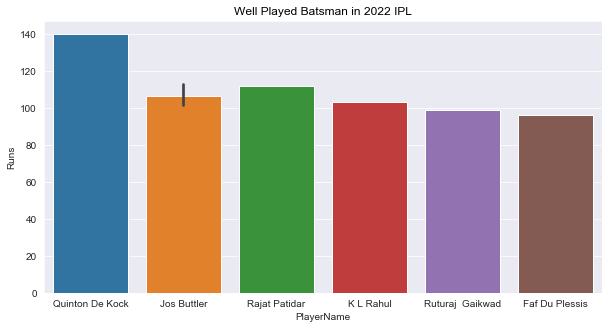

In [255]:
plt.figure(figsize=(10,5))
sns.barplot(x='PlayerName',y='Runs',data=Top10_Batters)
plt.title('Well Played Batsman in 2022 IPL',color='black')
plt.show()

# Players Bowling Performance 

In [256]:
Bowling_data=pd.read_csv("bowling.csv")
Bowling_data

,MatchID,InningsNo,Team,PlayerName,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,BowlingOrder,TotalLegalBallsBowled,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate
0,1,1,KKR,Umesh Yadav,4.0,0,20,2,2,1,5.00,1,24,15,7,0,0,1,1,12.0
1,1,1,KKR,Shivam Mavi,4.0,0,35,0,1,1,8.75,2,24,12,7,1,0,3,2,0.0
2,1,1,KKR,Varun Chakaravarthy,4.0,0,23,1,1,0,5.75,3,24,11,10,1,0,1,1,24.0
3,1,1,KKR,Sunil Narine,4.0,0,15,0,0,0,3.75,4,24,10,13,1,0,0,0,0.0
4,1,1,KKR,Andre Russell,4.0,0,38,1,0,0,9.50,5,24,7,10,1,0,5,1,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,76,2,RR,Trent Boult,4.0,1,14,1,2,0,3.50,1,24,17,4,2,0,1,0,24.0
853,76,2,RR,Prasidh Krishna,4.0,0,40,1,2,0,10.00,2,24,13,2,3,0,6,1,24.0
854,76,2,RR,Yuzvendra Chahal,4.0,0,20,1,0,0,5.00,3,24,10,10,3,0,1,0,24.0
855,76,2,RR,Obed McCoy,3.1,0,26,0,0,0,8.21,4,19,5,10,1,0,2,1,0.0


In [257]:
Bowling_data.head()

,MatchID,InningsNo,Team,PlayerName,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,BowlingOrder,TotalLegalBallsBowled,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate
0,1,1,KKR,Umesh Yadav,4.0,0,20,2,2,1,5.00,1,24,15,7,0,0,1,1,12.0
1,1,1,KKR,Shivam Mavi,4.0,0,35,0,1,1,8.75,2,24,12,7,1,0,3,2,0.0
2,1,1,KKR,Varun Chakaravarthy,4.0,0,23,1,1,0,5.75,3,24,11,10,1,0,1,1,24.0
3,1,1,KKR,Sunil Narine,4.0,0,15,0,0,0,3.75,4,24,10,13,1,0,0,0,0.0
4,1,1,KKR,Andre Russell,4.0,0,38,1,0,0,9.50,5,24,7,10,1,0,5,1,24.0


In [258]:
Bowling_data.tail()

,MatchID,InningsNo,Team,PlayerName,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,BowlingOrder,TotalLegalBallsBowled,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate
852,76,2,RR,Trent Boult,4.0,1,14,1,2,0,3.50,1,24,17,4,2,0,1,0,24.0
853,76,2,RR,Prasidh Krishna,4.0,0,40,1,2,0,10.00,2,24,13,2,3,0,6,1,24.0
854,76,2,RR,Yuzvendra Chahal,4.0,0,20,1,0,0,5.00,3,24,10,10,3,0,1,0,24.0
855,76,2,RR,Obed McCoy,3.1,0,26,0,0,0,8.21,4,19,5,10,1,0,2,1,0.0
856,76,2,RR,Ravichandran Ashwin,3.0,0,32,0,0,0,10.67,5,18,2,10,3,0,1,2,0.0


In [259]:
Bowling_data.describe(include='all')

,MatchID,InningsNo,Team,PlayerName,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,BowlingOrder,TotalLegalBallsBowled,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate
count,857.00000,857.000000,857,857,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
unique,NaN,NaN,10,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,RCB,Yuzvendra Chahal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,94,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,37.36056,1.500583,NaN,NaN,3.322520,0.032672,27.987165,0.990665,0.819137,0.084014,8.719253,3.427071,19.997666,7.737456,7.449242,1.191365,0.067678,2.439907,1.239207,9.571027
std,21.52524,0.500292,NaN,NaN,1.001841,0.184331,11.262110,1.074299,1.098515,0.301769,3.348249,1.703382,5.974439,3.876289,3.640383,1.183323,0.277831,1.724329,1.181023,9.633395
min,1.00000,1.000000,NaN,NaN,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.00000,1.000000,NaN,NaN,3.000000,0.000000,20.000000,0.000000,0.000000,0.000000,6.500000,2.000000,18.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,37.00000,2.000000,NaN,NaN,4.000000,0.000000,28.000000,1.000000,0.000000,0.000000,8.330000,3.000000,24.000000,8.000000,7.000000,1.000000,0.000000,2.000000,1.000000,8.000000
75%,56.00000,2.000000,NaN,NaN,4.000000,0.000000,36.000000,2.000000,1.000000,0.000000,10.500000,5.000000,24.000000,10.000000,10.000000,2.000000,0.000000,4.000000,2.000000,18.000000


In [260]:
Bowling_data.isnull().sum()

MatchID                  0
InningsNo                0
Team                     0
PlayerName               0
Overs                    0
Maidens                  0
Runs                     0
Wickets                  0
Wides                    0
NoBalls                  0
Economy                  0
BowlingOrder             0
TotalLegalBallsBowled    0
DotBalls                 0
Ones                     0
Twos                     0
Threes                   0
Fours                    0
Sixes                    0
StrikeRate               0
dtype: int64

In [261]:
#Data Preparation for Players Bowling Performance

In [262]:
Bowlers=Bowling_data.loc[(Bowling_data['Wickets']>=3)]
Bowlers

,MatchID,InningsNo,Team,PlayerName,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,BowlingOrder,TotalLegalBallsBowled,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate
8,1,2,CSK,Dwayne Bravo,4.0,0,20,3,0,0,5.00,4,24,11,10,1,0,2,0,8.0
15,2,1,DC,Kuldeep Yadav,4.0,0,18,3,0,0,4.50,5,24,8,14,2,0,0,0,8.0
19,2,2,MI,Basil Thampi,4.0,0,35,3,3,0,8.75,3,24,11,7,1,1,3,2,8.0
34,4,1,GT,Mohammad Shami,4.0,0,25,3,0,0,6.25,1,24,13,6,0,1,4,0,8.0
55,5,2,RR,Yuzvendra Chahal,4.0,0,22,3,0,0,5.50,5,24,8,12,3,0,1,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,70,1,PBSK,Harpreet Brar,4.0,0,26,3,0,0,6.50,5,24,11,8,2,0,2,1,8.0
831,74,2,RCB,Josh Hazlewood,4.0,0,43,3,3,0,10.75,2,24,11,5,1,1,3,3,8.0
836,75,1,RR,Prasidh Krishna,4.0,0,22,3,1,0,5.50,2,24,17,3,0,0,5,1,8.0
837,75,1,RR,Obed McCoy,4.0,0,23,3,1,0,5.75,3,24,10,10,2,0,2,0,8.0


In [263]:
Top_Bowlers=Bowlers.sort_values('Wickets',ascending=False)
Top_Bowlers

,MatchID,InningsNo,Team,PlayerName,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,BowlingOrder,TotalLegalBallsBowled,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate
642,56,1,MI,Jasprit Bumrah,4.0,1,10,5,0,0,2.50,3,24,18,4,1,0,1,0,4.8
463,40,2,SRH,Umran Malik,4.0,0,25,5,1,0,6.25,5,24,12,8,0,0,4,0,4.8
628,54,2,RCB,Wanindu Hasaranga,4.0,1,18,5,0,0,4.50,7,24,14,8,0,0,1,1,4.8
351,30,2,RR,Yuzvendra Chahal,4.0,0,40,5,4,0,10.00,5,24,7,11,0,1,4,1,4.8
381,33,2,MI,Daniel Sams,4.0,0,30,4,1,0,7.50,1,24,12,7,1,0,2,2,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,39,2,RR,Ravichandran Ashwin,4.0,0,17,3,1,0,4.25,3,24,14,8,1,0,0,1,8.0
15,2,1,DC,Kuldeep Yadav,4.0,0,18,3,0,0,4.50,5,24,8,14,2,0,0,0,8.0
464,41,1,DC,Mustafizur Rahman,4.0,0,18,3,1,0,4.50,1,24,14,7,1,0,2,0,8.0
470,41,2,KKR,Umesh Yadav,4.0,0,24,3,0,0,6.00,1,24,13,6,0,2,3,0,8.0


In [264]:
Top_10_Bowlers=Top_Bowlers.nlargest(10,['Wickets'])
Top_10_Bowlers

,MatchID,InningsNo,Team,PlayerName,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,BowlingOrder,TotalLegalBallsBowled,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate
642,56,1,MI,Jasprit Bumrah,4.0,1,10,5,0,0,2.50,3,24,18,4,1,0,1,0,4.80
463,40,2,SRH,Umran Malik,4.0,0,25,5,1,0,6.25,5,24,12,8,0,0,4,0,4.80
628,54,2,RCB,Wanindu Hasaranga,4.0,1,18,5,0,0,4.50,7,24,14,8,0,0,1,1,4.80
351,30,2,RR,Yuzvendra Chahal,4.0,0,40,5,4,0,10.00,5,24,7,11,0,1,4,1,4.80
381,33,2,MI,Daniel Sams,4.0,0,30,4,1,0,7.50,1,24,12,7,1,0,2,2,6.00
268,23,2,PBSK,Odean Smith,3.0,0,30,4,2,0,10.00,4,18,9,4,1,0,1,3,4.50
532,46,2,CSK,Mukesh Choudhary,4.0,0,46,4,1,0,11.50,1,24,9,5,3,0,4,3,6.00
323,28,1,SRH,Umran Malik,4.0,1,28,4,0,0,7.00,5,24,15,4,0,0,3,2,6.00
661,57,2,GT,Rashid Khan,3.5,0,24,4,2,0,6.26,5,23,11,10,0,0,0,2,5.75
360,31,2,RCB,Josh Hazlewood,4.0,0,25,4,2,0,6.25,3,24,10,11,1,0,1,1,6.00


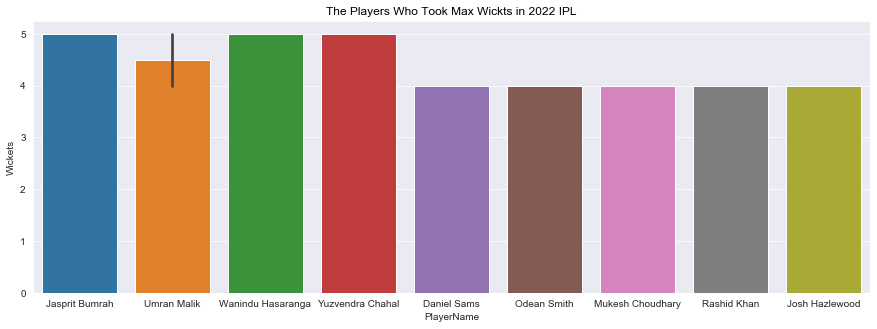

In [265]:
plt.figure(figsize=(15,5))
sns.barplot(x='PlayerName',y='Wickets',data=Top_10_Bowlers)
plt.title('The Players Who Took Max Wickts in 2022 IPL',color='black')
plt.show()